# Disease Prediction Using Machine Learning
### Dataset Used - https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning

## Import Dataset

In [181]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Create database and table

In [5]:
# Creating database and table in that database

conn = sqlite3.connect('disease.db')

conn.execute('''CREATE TABLE DISEASE_PROGNOSIS (
                ID          INT PRIMARY KEY     NOT NULL,
                PROGNOSIS   TEXT NOT NULL);''')
conn.close()

### 2. Import data from csv

In [139]:
# Inserting data into database table

disease_test_df = pd.read_csv('Disease_Testing.csv')
disease_train_df = pd.read_csv('Disease_Training.csv')

disease_df = pd.concat([disease_test_df, disease_train_df], ignore_index=True)

len(disease_df), len(disease_test_df), len(disease_train_df)

(4962, 42, 4920)

In [140]:
disease_df.sample(5)

,id,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4903,4962,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis E
2933,2992,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis C
2945,3004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypoglycemia
3622,3681,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Paralysis (brain hemorrhage)
3685,3744,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Arthritis


### 3. Insert data in table from DataFrame

In [28]:
# Inserting data into table

conn = sqlite3.connect('disease.db')

conn.execute('DELETE FROM DISEASE_PROGNOSIS')
disease_df[['id', 'prognosis']].to_sql('DISEASE_PROGNOSIS', conn, if_exists = 'append', index=False)

conn.commit()

# Get total record count of table
c1 = conn.execute('SELECT COUNT(*) FROM DISEASE_PROGNOSIS')
print(c1.fetchall())

# Get records with Id < 110
c2 = conn.execute('SELECT * FROM DISEASE_PROGNOSIS WHERE ID < 110')
print(c2.fetchall())

conn.close()

[(4962,)]
[(101, 'Fungal infection'), (102, 'Fungal infection'), (103, 'Fungal infection'), (104, 'Fungal infection'), (105, 'Fungal infection'), (106, 'Fungal infection'), (107, 'Fungal infection'), (108, 'Fungal infection'), (109, 'Fungal infection')]


## Preparing Dataset

### 1. Cleaning Data

In [41]:
# check for missing values
missing_data = disease_df.isna().sum()
missing_data[missing_data > 0]

# There is no missing data

Series([], dtype: int64)

In [46]:
# Check for duplicate records in data
disease_df[disease_df.duplicated()]

# There is no duplicate data in DF

,id,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis


In [48]:
disease_df.describe()

,id,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,...,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000
mean,2589.795042,0.138049,0.160016,0.021967,0.045143,0.021967,0.162233,0.139057,0.045143,0.045143,...,0.021967,0.021967,0.021967,0.023378,0.023176,0.023176,0.023176,0.023176,0.023378,0.023176
std,1449.511053,0.344986,0.366658,0.146590,0.207639,0.146590,0.368702,0.346041,0.207639,0.207639,...,0.146590,0.146590,0.146590,0.151115,0.150478,0.150478,0.150478,0.150478,0.151115,0.150478
min,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1341.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2581.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3821.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6042.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


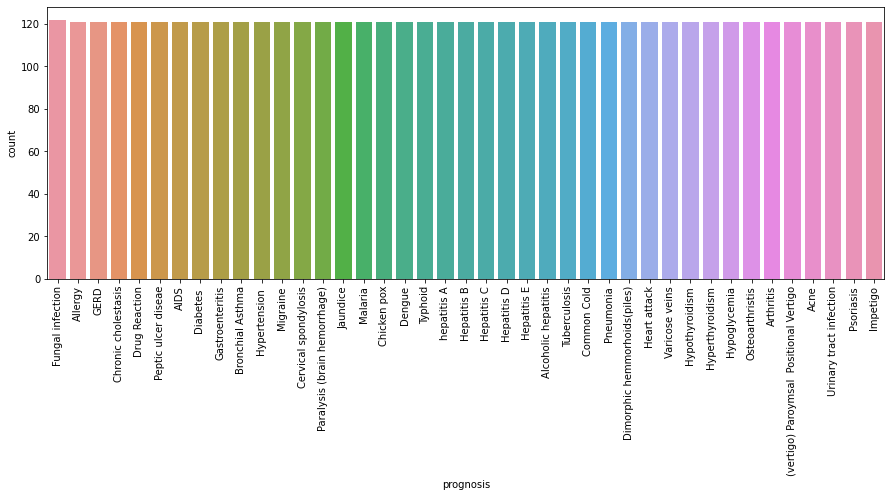

In [150]:
# Check the distribution of target values in data
#disease_df['prognosis'].value_counts()

fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(disease_df['prognosis'])
plt.xticks(rotation=90)
plt.show()

### 2. Prepare training and test sets

In [56]:
# Check values for target feature
disease_df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [60]:
# Convert categorical values to numeric
disease_df['prognosis'] = disease_df['prognosis'].astype('category')
disease_df['prognosis_num'] = disease_df['prognosis'].cat.codes
disease_df[['prognosis','prognosis_num']].head()

,prognosis,prognosis_num
0,Fungal infection,15
1,Allergy,4
2,GERD,16
3,Chronic cholestasis,9
4,Drug Reaction,14


In [96]:
# Check Unique values
disease_df[['prognosis_num','prognosis']].groupby(['prognosis_num','prognosis']).groups.keys()

dict_keys([(0, '(vertigo) Paroymsal  Positional Vertigo'), (1, 'AIDS'), (2, 'Acne'), (3, 'Alcoholic hepatitis'), (4, 'Allergy'), (5, 'Arthritis'), (6, 'Bronchial Asthma'), (7, 'Cervical spondylosis'), (8, 'Chicken pox'), (9, 'Chronic cholestasis'), (10, 'Common Cold'), (11, 'Dengue'), (12, 'Diabetes '), (13, 'Dimorphic hemmorhoids(piles)'), (14, 'Drug Reaction'), (15, 'Fungal infection'), (16, 'GERD'), (17, 'Gastroenteritis'), (18, 'Heart attack'), (19, 'Hepatitis B'), (20, 'Hepatitis C'), (21, 'Hepatitis D'), (22, 'Hepatitis E'), (23, 'Hypertension '), (24, 'Hyperthyroidism'), (25, 'Hypoglycemia'), (26, 'Hypothyroidism'), (27, 'Impetigo'), (28, 'Jaundice'), (29, 'Malaria'), (30, 'Migraine'), (31, 'Osteoarthristis'), (32, 'Paralysis (brain hemorrhage)'), (33, 'Peptic ulcer diseae'), (34, 'Pneumonia'), (35, 'Psoriasis'), (36, 'Tuberculosis'), (37, 'Typhoid'), (38, 'Urinary tract infection'), (39, 'Varicose veins'), (40, 'hepatitis A')])

In [71]:
disease_df[disease_df['prognosis_num'] == 1]['prognosis'].unique()

['AIDS']
Categories (41, object): ['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne', 'Alcoholic hepatitis', ..., 'Typhoid', 'Urinary tract infection', 'Varicose veins', 'hepatitis A']

In [120]:
# Use OneHotEncoding for categorical column
#disease_df_new = disease_df.drop('prognosis', axis=1)
#encoder = OneHotEncoder()
#disease_df_enc = pd.DataFrame(encoder.fit_transform(disease_df_new[['prognosis_num']]).toarray())
#disease_df_new.head()

# combining encoded DF with original DF
#encoded_df = disease_df_new.join(disease_df_enc)
#encoded_df.head()

In [122]:
# prepare features and target
X = disease_df.drop(['prognosis', 'prognosis_num'], axis=1)
y = disease_df['prognosis_num']

# Split training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

X_train.shape , X_test.shape

((3969, 133), (993, 133))

## Build ML Model

### 1. Logictic Regression

In [126]:
model = LogisticRegression()
model.fit(X_train, y_train)

model.score(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9982363315696648

In [128]:
y_pred = model.predict(X_test)

In [182]:
#accuracy_score(y_test, y_pred)
r2_score(y_test, y_pred)

0.9992020576798816

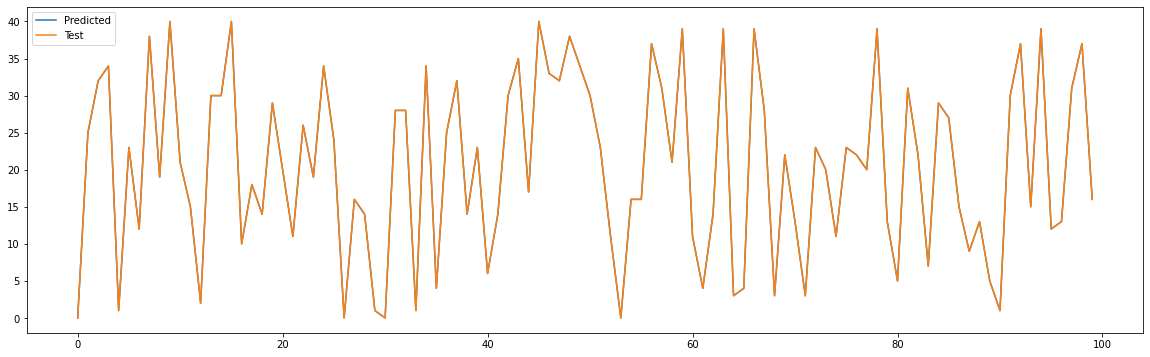

In [200]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(y_pred[:100], label = 'Predicted')
ax.plot(y_test.values[:100], label = 'Test')
plt.legend()

plt.show()

In [197]:
y_pred[:10]

array([ 0, 25, 32, 34,  1, 23, 12, 38, 19, 40], dtype=int8)

### 2. K-Nearest Neighbors

In [201]:
from sklearn.neighbors import KNeighborsRegressor

In [204]:
# function to apply algorithm with different parameters

scores = []

def apply_knn(n):
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accu = r2_score(y_test, y_pred)
    scores.append(accu)

In [205]:
scores = []

for i in range(1, 15):
    apply_knn(i)

scores

[0.05992789828790457,
 0.30896347989041606,
 0.32525439179534377,
 0.3386886784035308,
 0.34208414462627923,
 0.3138490295124373,
 0.3100326049888287,
 0.3144755389122178,
 0.31873357577763184,
 0.31846113612272164,
 0.3068596611217812,
 0.2965570981459926,
 0.2780142517605877,
 0.25670730488774074]

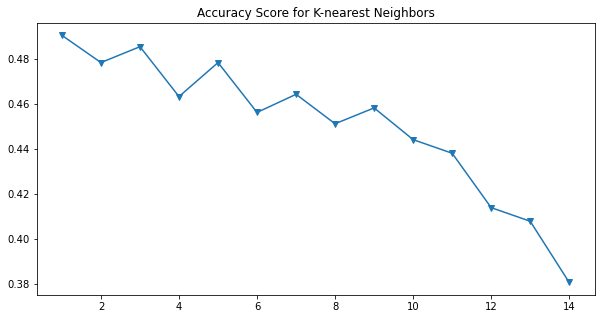

In [180]:
fig, ax = plt.subplots(figsize=(10, 5))

#sns.relplot(data=scores, x="No of Neighbors", y="Accuracy Score", kind="line")
ax.plot(range(1,15), scores , marker='v')
ax.set_title("Accuracy Score for K-nearest Neighbors")
plt.show()